In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [35]:
data = pd.read_csv('dataset/kc_house_data.csv')

In [36]:
data

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000 221900.00         3       1.00   
1      6414100192  20141209T000000 538000.00         3       2.25   
2      5631500400  20150225T000000 180000.00         2       1.00   
3      2487200875  20141209T000000 604000.00         4       3.00   
4      1954400510  20150218T000000 510000.00         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000 360000.00         3       2.50   
21609  6600060120  20150223T000000 400000.00         4       2.50   
21610  1523300141  20140623T000000 402101.00         2       0.75   
21611   291310100  20150116T000000 400000.00         3       2.50   
21612  1523300157  20141015T000000 325000.00         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650    1.00           0     0  ...      7   
1             2570      7242    2.00           0     0  ...      7   
2              770     10000    1.00           0     0  ...      6   
3             1960      5000    1.00           0     0  ...      7   
4             1680      8080    1.00           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131    3.00           0     0  ...      8   
21609         2310      5813    2.00           0     0  ...      8   
21610         1020      1350    2.00           0     0  ...      7   
21611         1600      2388    2.00           0     0  ...      8   
21612         1020      1076    2.00           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat  \
0            1180              0      1955             0    98178 47.51   
1            2170            400      1951          1991    98125 47.72   
2             770              0      1933             0    98028 47.74   
3            1050            910      1965             0    98136 47.52   
4            1680              0      1987             0    98074 47.62   
...           ...            ...       ...           ...      ...   ...   
21608        1530              0      2009             0    98103 47.70   
21609        2310              0      2014             0    98146 47.51   
21610        1020              0      2009             0    98144 47.59   
21611        1600              0      2004             0    98027 47.53   
21612        1020              0      2008             0    98144 47.59   

         long  sqft_living15  sqft_lot15  
0     -122.26           1340        5650  
1     -122.32           1690        7639  
2     -122.23           2720        8062  
3     -122.39           1360        5000  
4     -122.05           1800        7503  
...       ...            ...         ...  
21608 -122.35           1530        1509  
21609 -122.36           1830        7200  
21610 -122.30           1020        2007  
21611 -122.07           1410        1287  
21612 -122.30           1020        1357  

[21613 rows x 21 columns]

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Novas perguntas do CEO para você


## 1 - Qual o número de imóvel por ano de construção?


In [38]:
data[['id','yr_built']].groupby('yr_built').count()

id
yr_built     
1900       87
1901       29
1902       27
1903       46
1904       45
...       ...
2011      130
2012      170
2013      201
2014      559
2015       38

[116 rows x 1 columns]

In [39]:
data.groupby('yr_built')['id'].count().reset_index()

yr_built   id
0        1900   87
1        1901   29
2        1902   27
3        1903   46
4        1904   45
..        ...  ...
111      2011  130
112      2012  170
113      2013  201
114      2014  559
115      2015   38

[116 rows x 2 columns]

´## 2 - Qual o menor número de quartos por ano de construção de imóveis?

In [40]:
#data.groupby('yr_built')['bedrooms'].min()
data[['yr_built','bedrooms']].groupby('yr_built').agg(['min','max'])

bedrooms    
              min max
yr_built             
1900            1   6
1901            2   8
1902            2   6
1903            1   6
1904            2   8
...           ...  ..
2011            1   5
2012            2   6
2013            2   7
2014            1   6
2015            1   5

[116 rows x 2 columns]

## 3 - Qual o preço de compra mais alto por cada número de quarto?

In [41]:
data[['bedrooms','price']].groupby('bedrooms').agg(['max','min'])

price          
                max       min
bedrooms                     
0        1295650.00 139950.00
1        1247000.00  75000.00
2        3278000.00  78000.00
3        3800000.00  82000.00
4        4489000.00 100000.00
5        7062500.00 133000.00
6        7700000.00 175000.00
7        3200000.00 280000.00
8        3300000.00 340000.00
9        1400000.00 450000.00
10       1148000.00 650000.00
11        520000.00 520000.00
33        640000.00 640000.00

## 4 - Qual a soma de todos os preços de compra por número de quartos?

In [42]:
data[['bedrooms','price']].groupby('bedrooms').sum()

price
bedrooms              
0           5323550.00
1          63210934.00
2        1107788602.00
3        4580263939.00
4        4372957028.00
5        1259346326.00
6         224541613.00
7          36145017.00
8          14366000.00
9           5363999.00
10          2458000.00
11           520000.00
33           640000.00

## 5 - Qual a soma de todos os preços de compra por número de quartos e banheiros?

In [43]:
data[['bedrooms','bathrooms','price']].groupby(['bedrooms','bathrooms']).agg(['sum'])

price
                          sum
bedrooms bathrooms           
0        0.00      3642600.00
         0.75       265000.00
         1.00       228000.00
         1.50       288000.00
         2.50       899950.00
...                       ...
10       2.00       650000.00
         3.00       660000.00
         5.25      1148000.00
11       3.00       520000.00
33       1.75       640000.00

[144 rows x 1 columns]

## 6 - Qual o tamanho médio das salas dos imóveis por ano de construição?

In [44]:
data[['sqft_living','yr_built']].agg(['max','mean','min'])

sqft_living  yr_built
max      13540.00   2015.00
mean      2079.90   1971.01
min        290.00   1900.00

In [45]:
data[['sqft_living','yr_built']].groupby('yr_built').agg(['max','mean','min'])

sqft_living              
                 max    mean   min
yr_built                          
1900            4380 1732.01   600
1901            3440 1763.62   680
1902            4480 1919.63  1000
1903            2800 1507.74   670
1904            7710 1603.18   800
...              ...     ...   ...
2011            5635 2313.68   894
2012            4920 2378.74   962
2013            5860 2636.59  1061
2014            5790 2615.39  1100
2015            5640 2596.32   710

[116 rows x 3 columns]

## 7 - Qual o tamanho mediano das salas dos imóveis por ano de construção?

In [46]:
data[['sqft_living','yr_built']].groupby('yr_built').agg(['max','median','min'])

sqft_living              
                 max  median   min
yr_built                          
1900            4380 1540.00   600
1901            3440 1610.00   680
1902            4480 1600.00  1000
1903            2800 1505.00   670
1904            7710 1280.00   800
...              ...     ...   ...
2011            5635 2270.00   894
2012            4920 2237.50   962
2013            5860 2580.00  1061
2014            5790 2650.00  1100
2015            5640 2590.00   710

[116 rows x 3 columns]

## 8 - Qual o desvio-padrão do tamanho das salsa dos imóveis por ano de construção?

In [47]:
data[['sqft_living','yr_built']].groupby('yr_built').agg(['mean','std','median'])

sqft_living                
                mean     std  median
yr_built                            
1900         1732.01  732.94 1540.00
1901         1763.62  668.23 1610.00
1902         1919.63  878.66 1600.00
1903         1507.74  469.72 1505.00
1904         1603.18 1076.87 1280.00
...              ...     ...     ...
2011         2313.68  804.86 2270.00
2012         2378.74  771.43 2237.50
2013         2636.59  883.50 2580.00
2014         2615.39  893.81 2650.00
2015         2596.32 1155.61 2590.00

[116 rows x 3 columns]

## 9 - Como é o crescimento médio de preços de compras dos imóveis, por ano , por dia e pela semana do ano?

In [48]:
 data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [49]:
data['date'] = pd.to_datetime(data['date'])

In [50]:
data['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [52]:
data['year'] = pd.to_datetime(data['date']).dt.year

In [62]:
by_year = data[['price','year']].groupby('year').sum().reset_index()

<BarContainer object of 2 artists>

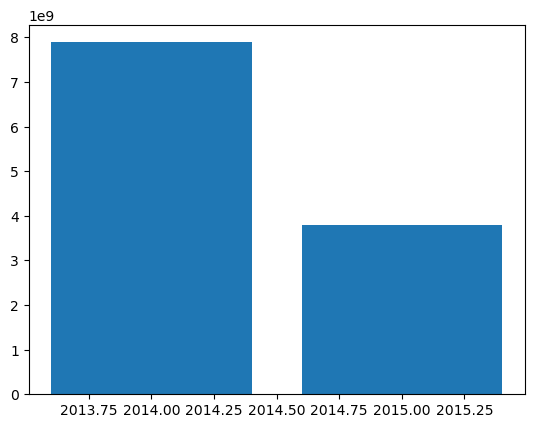

In [64]:
plt.bar(by_year['year'] , by_year['price'])

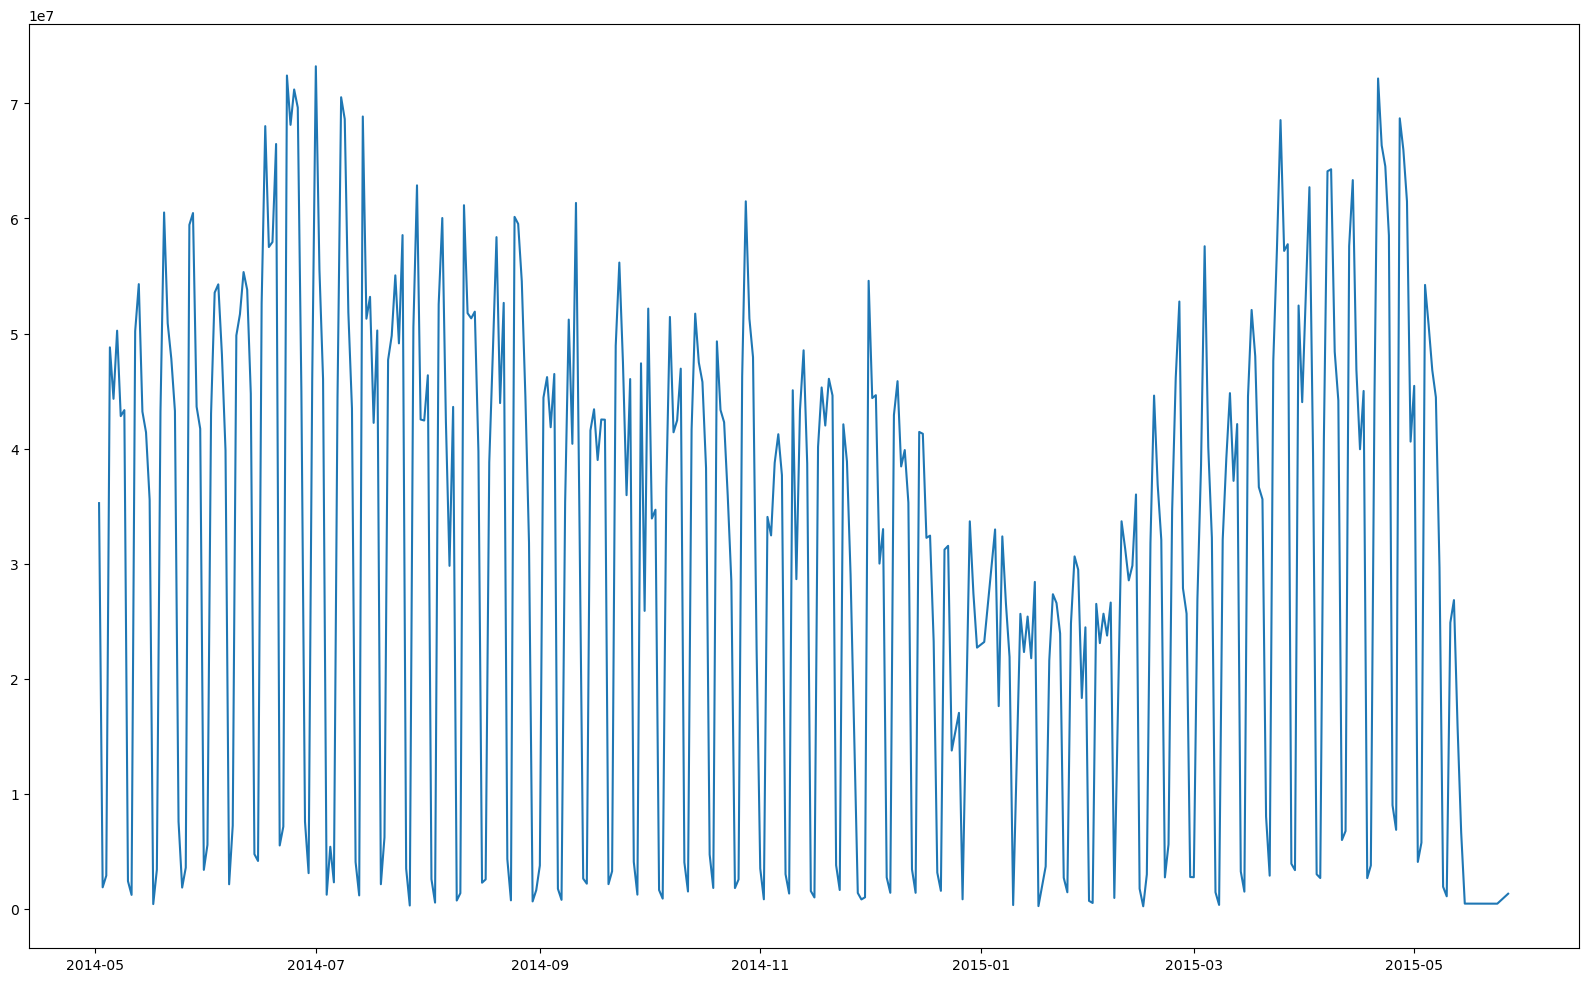

In [69]:

# segundo grfico
data['day'] = pd.to_datetime( data['date'])
by_day = data[['price','day']].groupby('day').sum().reset_index()

plt.figure(figsize=(20,12))
plt.plot(by_day['day'] , by_day['price'])


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

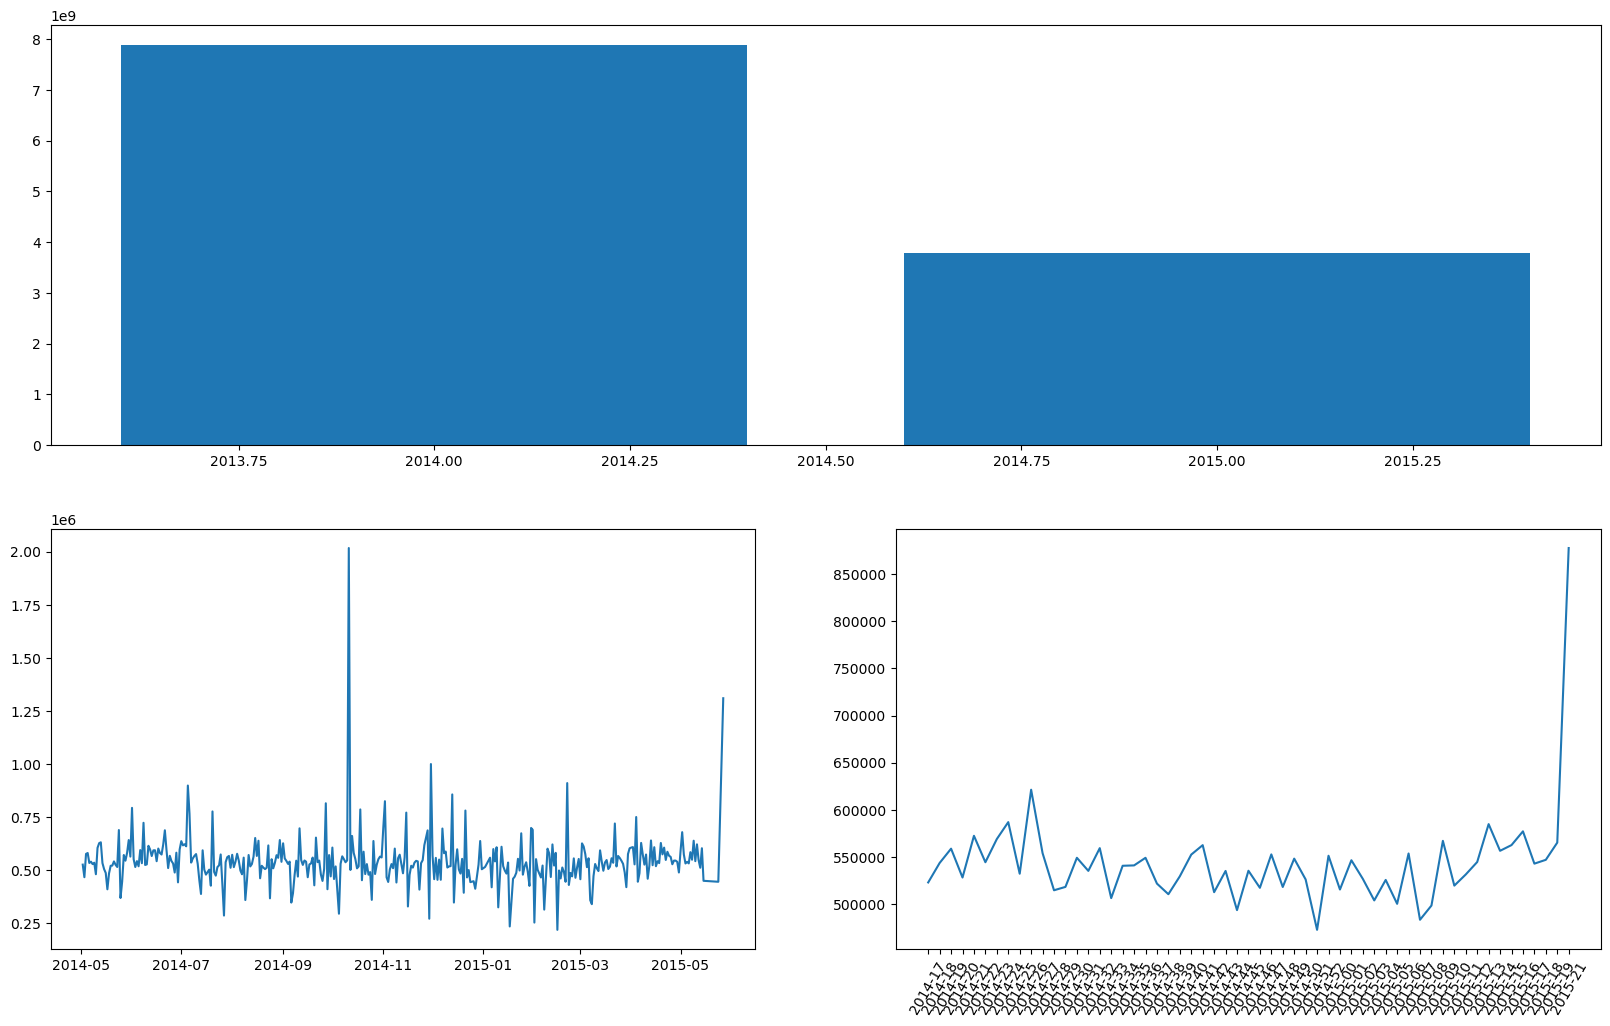

In [72]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20,12))
specs = gridspec.GridSpec(ncols = 2 , nrows = 2 , figure= fig)


ax1 = fig.add_subplot(specs[0,:]) # first row
ax2 = fig.add_subplot(specs[1,0]) # second rows - first column
ax3 = fig.add_subplot(specs[1,1]) # second rows - second column

#first grath

data['year'] = pd.to_datetime(data['date']).dt.year
by_year = data[['price','year']].groupby('year').sum().reset_index()
ax1.bar(by_year['year'] , by_year['price'])


#second graph
data['day'] =pd.to_datetime(data['date'])
by_day = data[['price','day']].groupby('day').mean().reset_index()
ax2.plot(by_day['day'],by_day['price'])



#third graph
data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%U')
by_year_week = data[['price','year_week']].groupby('year_week').mean().reset_index()
ax3.plot(by_year_week['year_week'],by_year_week['price'])
plt.xticks(rotation = 60)

## 10 - Gostaria de olhar no mapa e conseguir identificar as casas com o maior preço.

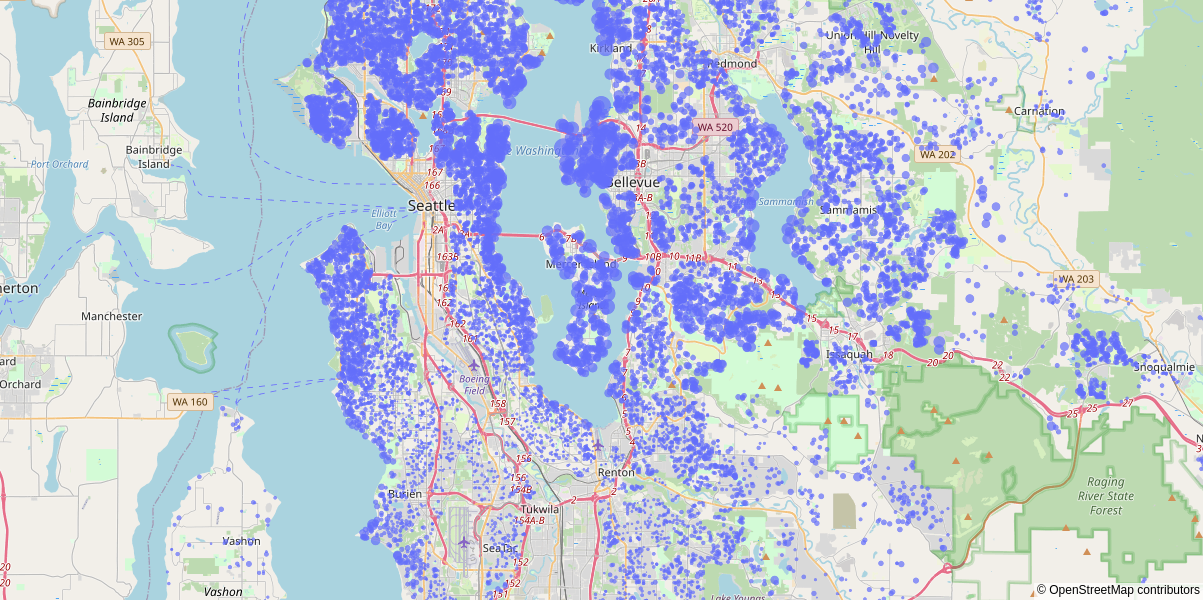

In [76]:
import plotly.express as px

houses = data[['id','lat','long','price']]


fig = px.scatter_mapbox(houses,
                       lat='lat',
                       lon='long',
                       size= 'price',
                       color_continuous_scale=px.colors.cyclical.IceFire,
                       size_max= 15,
                       zoom = 10)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height = 600, margin = {'r':0,
                                          't':0,
                                          'l':0,
                                          'b':0})
fig.show()